# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()
degs=(-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45)

In [3]:
import dlibFrontal as faceDetector
for deg in degs:
    faceDetector.processDatabase(dataset, names, deg)

# headPose dataset の検出処理後のデータ解析

In [8]:
dfs={}
for deg in degs:
    dfs[deg] = pd.read_csv("log_headPose_%d.csv" % deg)
    print deg, dfs[deg]["truePositives"].mean()

-45 0.8623655913978494
-40 0.8978494623655914
-35 0.9297491039426523
-30 0.9422939068100359
-25 0.9616487455197132
-20 0.9695340501792115
-15 0.982078853046595
-10 0.9853046594982079
-5 0.9863799283154122
0 0.9878136200716846
5 0.9870967741935484
10 0.9842293906810036
15 0.9806451612903225
20 0.9695340501792115
25 0.9566308243727598
30 0.9415770609318996
35 0.9129032258064517
40 0.8838709677419355
45 0.8480286738351255


In [11]:
rates = [dfs[deg]["truePositives"].mean() for deg in degs]
falseRates = [dfs[deg]["falsePositives"].mean() for deg in degs]
data = {"degs":degs, "rates":rates, "falseRates":falseRates}
df = pd.DataFrame(data, columns=["degs", "rates", "falseRates"])

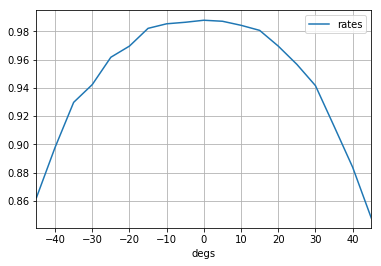

In [12]:
df.plot(x="degs", y="rates", grid=True)

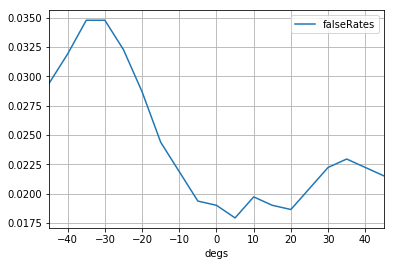

In [13]:
df.plot(x="degs", y="falseRates", grid=True)